In [1]:
from os import listdir
from os.path import isfile, join
import pickle
import tensorflow.keras.saving as ker_saving

In [2]:
model_base = "../models"

res = []
models = dict()

for f_name in listdir(model_base):
    path = join(model_base, f_name)
    if isfile(path):
        try:
            with open(path, 'rb') as f:
                model = pickle.load(f)
                models[f_name] = model
        except pickle.UnpicklingError:
            model = ker_saving.load_model(path)
            models[f_name] = model

In [3]:
for name, model in models.items():
    print(name)

CatBoostClassifier.pkl
LogisticRegression.pkl
nn.keras
RandomForestClassifier.pkl
TfidfVectorizer.pkl


In [4]:
tf = models['TfidfVectorizer.pkl']

In [31]:
import pandas as pd
df_parsed = pd.read_csv('../data/parsed_result.csv')

In [32]:
df_parsed.sample()

,text,isToxic
45,You're so pathetic it hurts.,1.0


In [7]:
choosed_model = 'RandomForestClassifier.pkl'
model = models[choosed_model]

In [8]:
import sys, os.path
utils = (os.path.abspath(os.path.join(os.path.dirname(''), '..'))
+ '/utils')
sys.path.append(utils) # to make all utils files importable
from text_refactorer import refactor_data
from loader import import_model
from model_worker import model_predict
from sklearn.metrics import f1_score

In [33]:
df_parsed.dropna(inplace=True)
df_parsed['text'] = refactor_data(df_parsed['text'])

In [10]:
from sklearn.metrics import f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

def show_model_perfection_metrics(y_test, y_pred):
    f1 = f1_score(y_test, y_pred)
    print(f"F1: {f1:.10}")
    cm = confusion_matrix(y_test, y_pred)

    plt.figure(figsize=(5, 5))
    sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
    plt.show()

In [40]:
# CatBoostClassifier.pkl
# LogisticRegression.pkl
# RandomForestClassifier.pkl
def get_model_score(model):
    print(model)
    mod_vec = import_model(f'../models/{model}','../models/TfidfVectorizer.pkl')
    y_pred = model_predict(mod_vec, df_parsed)
    f1_score(df_parsed['isToxic'], y_pred)
    show_model_perfection_metrics(df_parsed['isToxic'], y_pred)
    df_parsed['pred'] = y_pred
    df_parsed[(df_parsed['isToxic'] != df_parsed['pred']) & df_parsed['isToxic']]
    return y_pred

CatBoostClassifier.pkl
F1: 0.4322033898


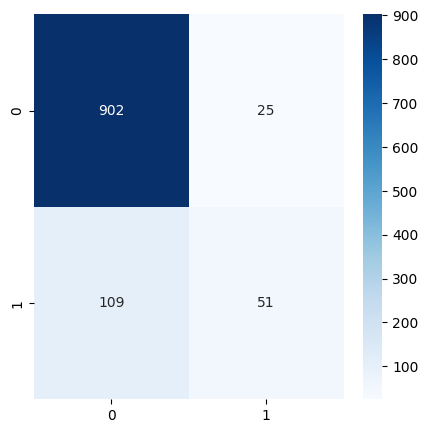

LogisticRegression.pkl
F1: 0.5414847162


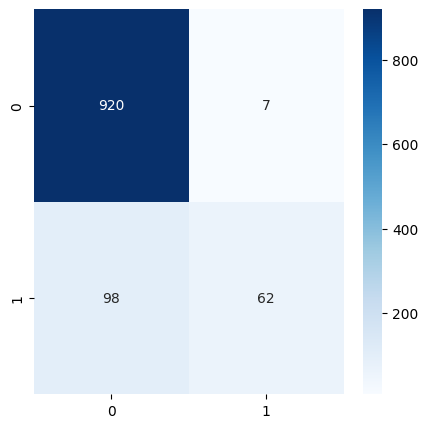

RandomForestClassifier.pkl
F1: 0.2837209302


[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  40 out of  40 | elapsed:    0.0s finished


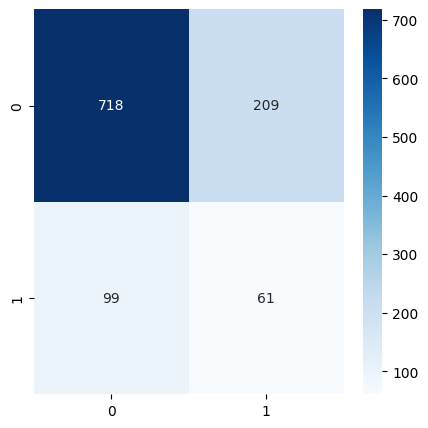

In [41]:
import numpy as np

accume = []

for model in ['CatBoostClassifier.pkl', 'LogisticRegression.pkl', 'RandomForestClassifier.pkl']:
    y_pred = get_model_score(model)
    accume.append(y_pred)

In [50]:
resulted_sum = (sum(accume) / 3).round()
f1_score(df_parsed['isToxic'], resulted_sum, average='weighted')

0.8692713580667392

F1: 0.8692713581


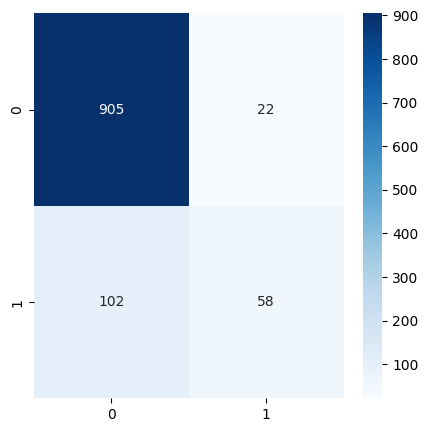

In [51]:
show_model_perfection_metrics(df_parsed['isToxic'], resulted_sum)

In [34]:
vec = models['TfidfVectorizer.pkl'].transform(df_parsed['text'])
y_pred = models['nn.keras'].predict(vec)

34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step


In [35]:
y_pred = [pre[0] for pre in y_pred]
y_pred = [round(pre)  for pre in y_pred]

Keras
F1: 0.0


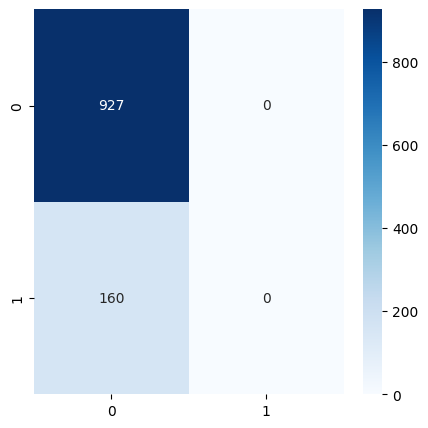

In [38]:
print('Keras')
f1_score(df_parsed['isToxic'], y_pred)
show_model_perfection_metrics(df_parsed['isToxic'], y_pred)
df_parsed['pred'] = y_pred